In [9]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Ignore warnings
import warnings
warnings.filterwarnings('ignore')

In [10]:
df=pd.read_csv(r"C:\Users\91994\Desktop\My Practice\Football_Data_Merged_Cleaned.csv")

In [4]:
df.columns

Index(['appearance_id', 'game_id', 'player_id', 'date_x', 'player_name_x',
       'competition_id_x', 'yellow_cards', 'red_cards', 'goals', 'assists',
       'minutes_played', 'game_event_id', 'date_y', 'minute', 'type_x',
       'description', 'player_in_id', 'player_assist_id', 'game_lineups_id',
       'type_y', 'number', 'player_name_y', 'team_captain', 'position_x',
       'competition_id_y', 'season', 'round', 'date', 'home_club_goals',
       'away_club_goals', 'home_club_position', 'away_club_position',
       'home_club_manager_name', 'away_club_manager_name', 'stadium',
       'attendance', 'referee', 'home_club_name', 'away_club_name',
       'aggregate', 'competition_type', 'name', 'last_season',
       'current_club_id', 'player_code', 'country_of_birth', 'date_of_birth',
       'sub_position', 'position_y', 'foot', 'height_in_cm',
       'market_value_in_eur', 'highest_market_value_in_eur',
       'contract_expiration_date', 'agent_name'],
      dtype='object')

## Descriptive analysis using various data analysis and visualization techniques : Team Comparison

### Business Question 1. Top 10 Highest Average Market Value by Home Team

Team with the highest average market value (Home Club):
home_club_name
Sporting Clube de Portugal             25000000.0
Sheffield United Football Club         25000000.0
club atletico de madrid sad            25000000.0
Citation profile for Stepan Zemtsov    20000000.0
Real Madrid Club de Football           17000000.0
Name: market_value_in_eur, dtype: float64


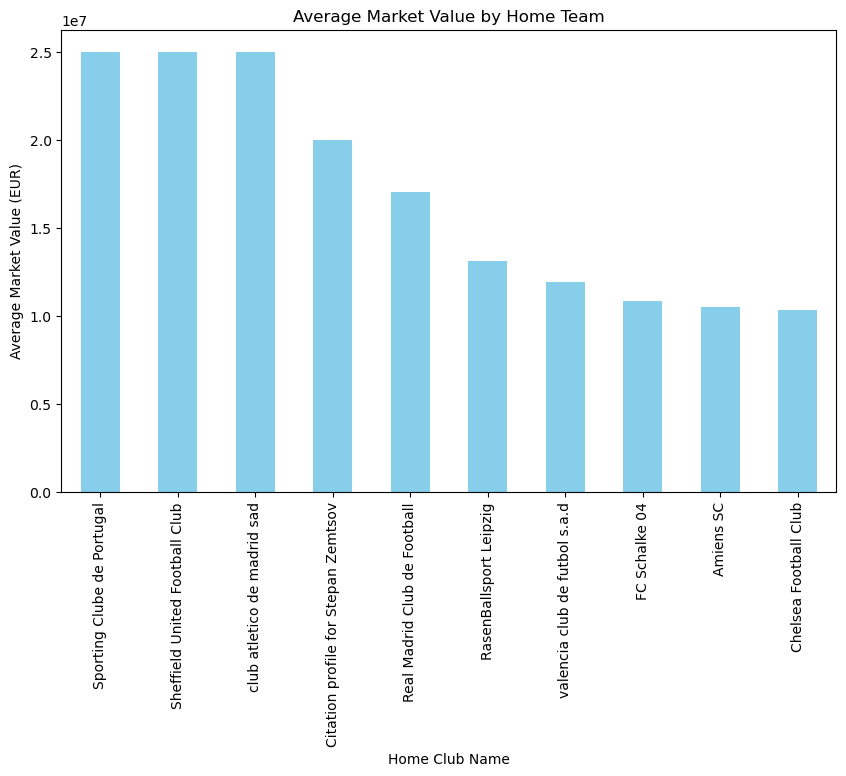

In [4]:
team_avg_market_value = df.groupby('home_club_name')['market_value_in_eur'].mean().sort_values(ascending=False)

# Display the top teams
print("Team with the highest average market value (Home Club):")
print(team_avg_market_value.head())

# Visualization
team_avg_market_value.head(10).plot(kind='bar', figsize=(10, 6), color='skyblue')
plt.title("Average Market Value by Home Team")
plt.ylabel("Average Market Value (EUR)")
plt.xlabel("Home Club Name")
plt.xticks(rotation=90)
plt.show()

#### The teams with the highest average market values are Sporting Clube de Portugal, Sheffield United Football Club, and Club Atletico de Madrid SAD, each at €25,000,000. Stepan Zemtsov has an average of €20,000,000, and Real Madrid has €17,000,000. These top clubs show higher player market values in comparison.

### Business Question 1.1: Top 10 Highest Average Market Value by Away Team

Team with the highest average market value (Away Club):
away_club_name
Real Madrid Club de Football    2.500000e+07
Sporting Clube de Portugal      2.500000e+07
UC Sampdoria                    2.000000e+07
Futebol Clube do Porto          1.633333e+07
1. FC Union Berlin              1.337500e+07
Name: market_value_in_eur, dtype: float64


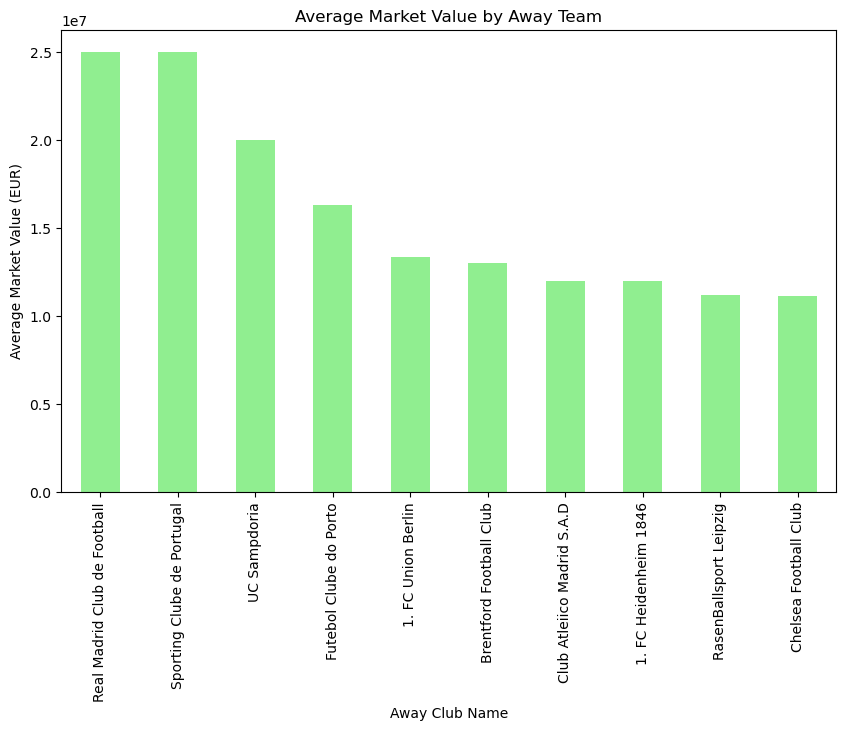

In [5]:
team_avg_market_value = df.groupby('away_club_name')['market_value_in_eur'].mean().sort_values(ascending=False)

# Display the top teams
print("Team with the highest average market value (Away Club):")
print(team_avg_market_value.head())

# Visualization
team_avg_market_value.head(10).plot(kind='bar', figsize=(10, 6), color='lightgreen')
plt.title("Average Market Value by Away Team")
plt.ylabel("Average Market Value (EUR)")
plt.xlabel("Away Club Name")
plt.xticks(rotation=90)
plt.show()

### The teams with the highest average market values for away clubs are Real Madrid and Sporting Clube de Portugal, each with an average of €25,000,000. UC Sampdoria follows with €20,000,000, Futebol Clube do Porto has €16,333,333, and 1. FC Union Berlin has €13,375,000. These top away clubs indicate higher player market values compared to the others.

### Business Question 1.2: Top 10 Highest Average Market Value by combined home and away teams

Teams with the highest average market value:
team_name
Sporting Clube de Portugal             25000000.0
Sheffield United Football Club         25000000.0
club atletico de madrid sad            25000000.0
Citation profile for Stepan Zemtsov    20000000.0
Real Madrid Club de Football           17000000.0
Name: market_value_in_eur, dtype: float64


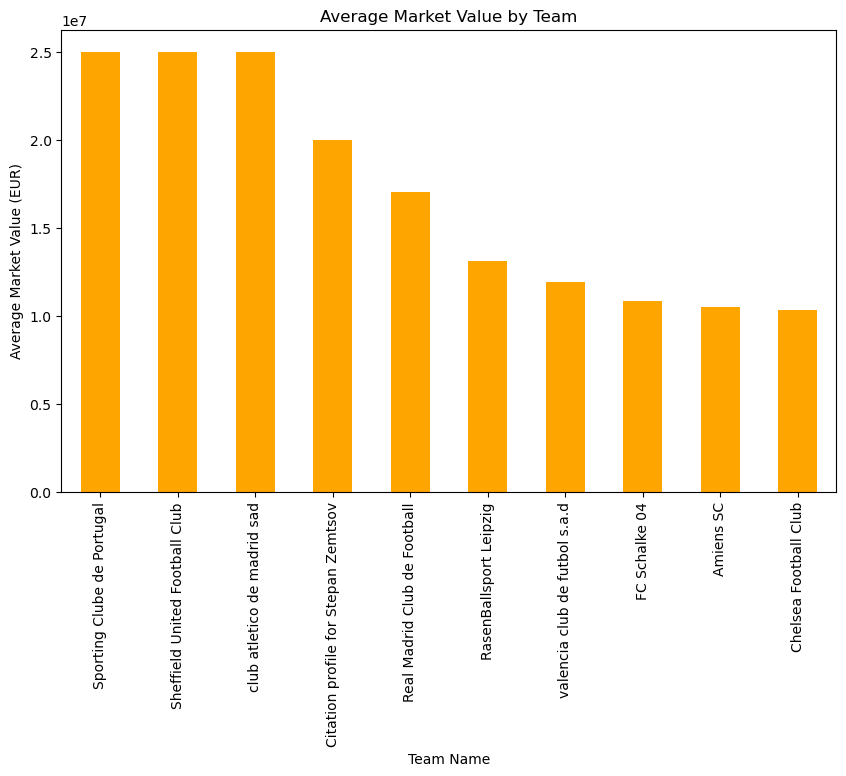

In [25]:
# Combine home and away club names
df_combined = pd.melt(df, value_vars=['home_club_name', 'away_club_name'], 
                      var_name='team_type', value_name='team_name')

# Merge with market values
df_combined = df_combined.merge(df[['market_value_in_eur']], left_index=True, right_index=True)

# Group by team name
team_avg_market_value = df_combined.groupby('team_name')['market_value_in_eur'].mean().sort_values(ascending=False)

# Display the result
print("Teams with the highest average market value:")
print(team_avg_market_value.head())

# Visualization
team_avg_market_value.head(10).plot(kind='bar', figsize=(10, 6), color='orange')
plt.title("Average Market Value by Team")
plt.ylabel("Average Market Value (EUR)")
plt.xlabel("Team Name")
plt.show()

#### Sporting Clube de Portugal has the highest average market value among the displayed teams.
#### Sheffield United Football Club and Club Atletico de Madrid S.A.D. have the second and third highest average market values, respectively.
#### The remaining teams, including Real Madrid Club de Football, RasenBallsport Leipzig, Valencia Club de Futbol S.A.D., FC Schalke 04, Amiens SC, and Chelsea Football Club, have lower average market values.

### Business Question2: Average performance (goals and assists) for both away and home teams

Teams with the highest average performance (goals and assists):
                goals  assists
team_name                     
Amkar Perm        2.0      0.0
FC Dordrecht      1.0      0.0
Udinese Calcio    1.0      0.0
Beerschot V.A.    1.0      0.0
Vejle Boldklub    1.0      0.0


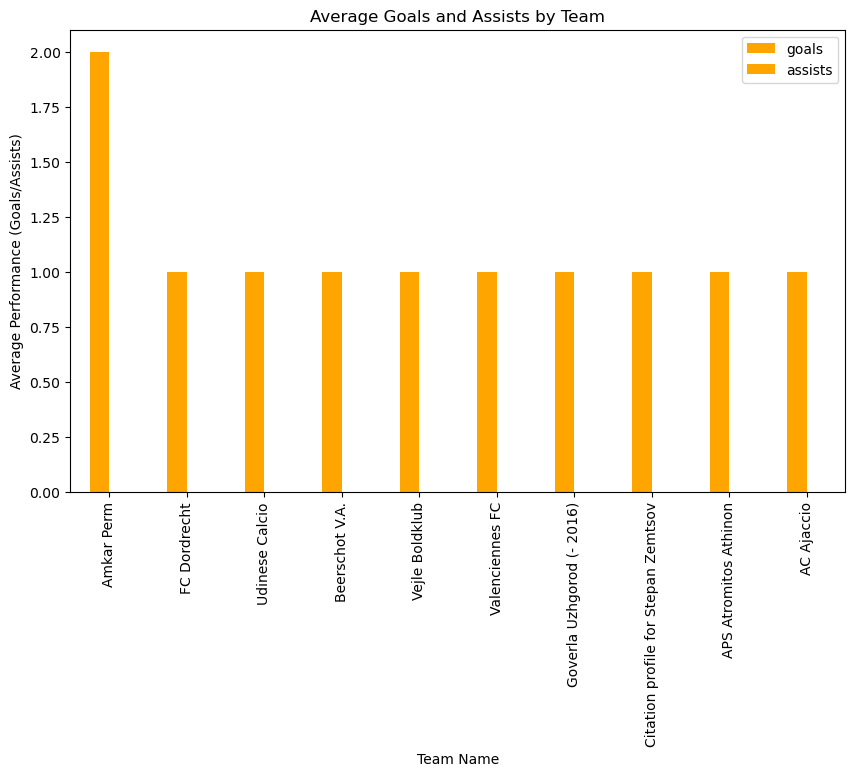

In [6]:
import pandas as pd
import matplotlib.pyplot as plt

# Combine home and away club names
df_combined = pd.melt(df, value_vars=['home_club_name', 'away_club_name'],
                      var_name='team_type', value_name='team_name')

# Merge with goals and assists data
df_combined = df_combined.merge(df[['goals', 'assists']], left_index=True, right_index=True)

# Group by team name and calculate the average of goals and assists
team_avg_performance = df_combined.groupby('team_name')[['goals', 'assists']].mean().sort_values(by='goals', ascending=False)

# Display the result
print("Teams with the highest average performance (goals and assists):")
print(team_avg_performance.head())

# Visualization
team_avg_performance.head(10).plot(kind='bar', figsize=(10, 6), color='orange')
plt.title("Average Goals and Assists by Team")
plt.ylabel("Average Performance (Goals/Assists)")
plt.xlabel("Team Name")
plt.xticks(rotation=90)
plt.show()

#### The chart illustrates that Amkar Perm has the highest average performance among the displayed teams, based on the combined average of their goals and assists. The other teams exhibit relatively similar levels of average performance, indicating a more balanced distribution of offensive output.

### Business Question 3: Top 10 both Away and home Clubs with Highest Average Goals

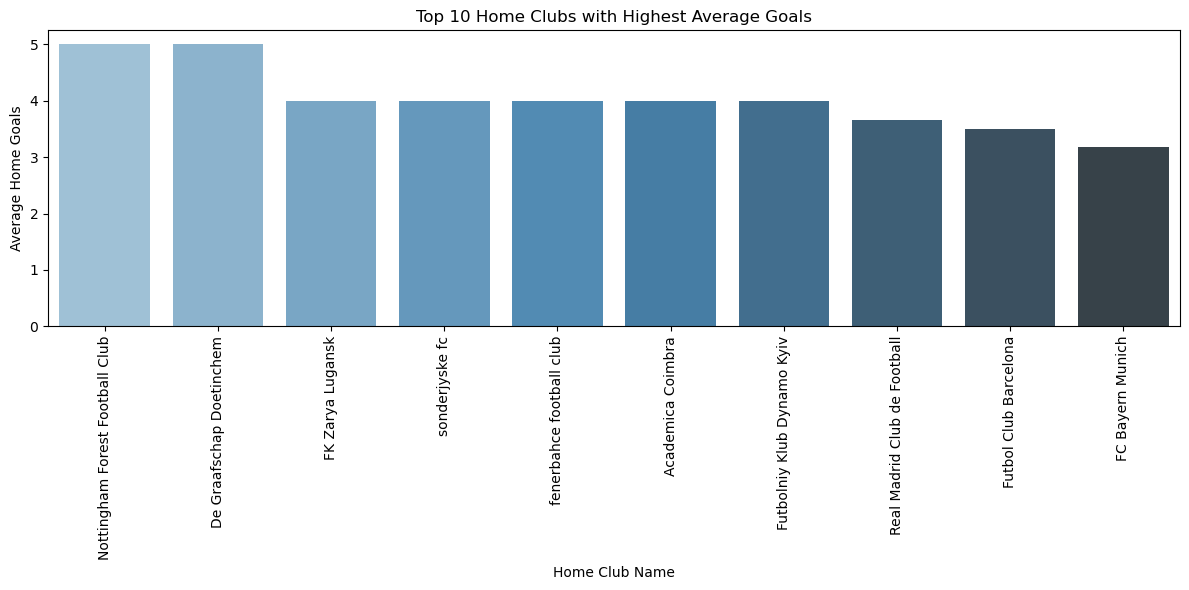

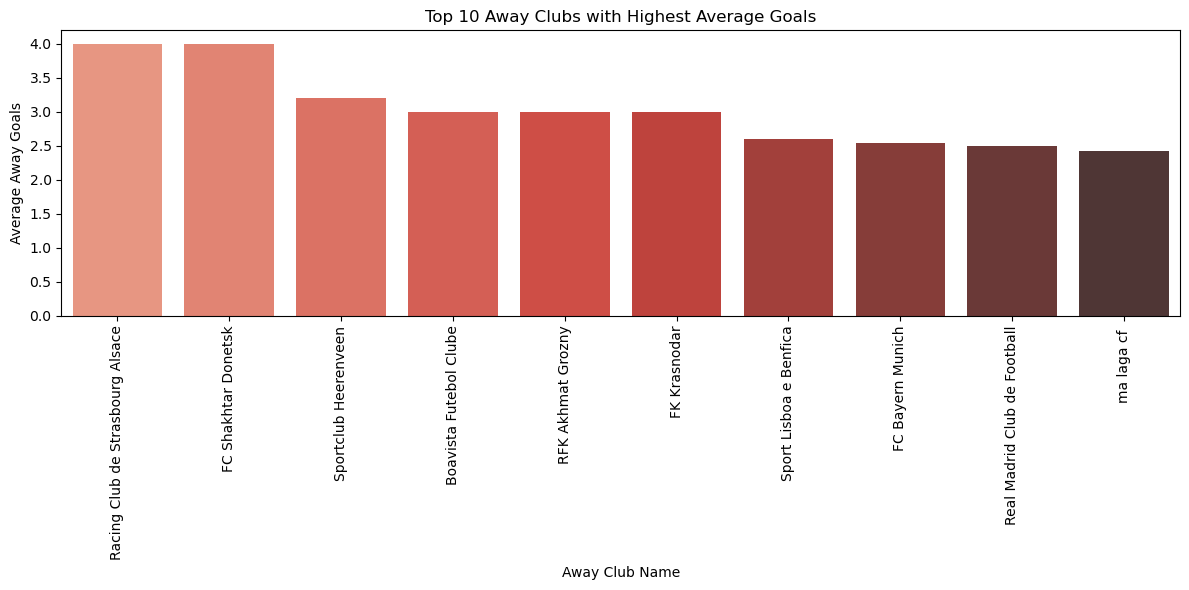

In [8]:
# Aggregating data to get the average goals per club for home and away
home_goals = df.groupby('home_club_name')['home_club_goals'].mean()
away_goals = df.groupby('away_club_name')['away_club_goals'].mean()

# Sort and select top 10 clubs based on average goals
top_home_goals = home_goals.sort_values(ascending=False).head(10)
top_away_goals = away_goals.sort_values(ascending=False).head(10)

# Plot for Top 10 Home Clubs
plt.figure(figsize=(12, 6))
sns.barplot(x=top_home_goals.index, y=top_home_goals.values, palette="Blues_d")
plt.title('Top 10 Home Clubs with Highest Average Goals')
plt.xlabel('Home Club Name')
plt.ylabel('Average Home Goals')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

# Plot for Top 10 Away Clubs
plt.figure(figsize=(12, 6))
sns.barplot(x=top_away_goals.index, y=top_away_goals.values, palette="Reds_d")
plt.title('Top 10 Away Clubs with Highest Average Goals')
plt.xlabel('Away Club Name')
plt.ylabel('Average Away Goals')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

#### The teams with the highest average market values for away clubs are Real Madrid and Sporting Clube de Portugal, each with an average of €25,000,000. UC Sampdoria follows with €20,000,000, Futebol Clube do Porto has €16,333,333, and 1. FC Union Berlin has €13,375,000. These top away clubs indicate higher player market values compared to the others.
#### The bar chart shows the top 10 football clubs with the highest average number of goals scored away from home. Racing Club de Strasbourg Alsace leads with the most goals, while Málaga CF scores the least among the top 10. 

### Hypothesis testing.

### Correlation Between Minutes Played and Market Value

In [49]:
from scipy.stats import pearsonr

# Calculate correlation
correlation, p_value = pearsonr(df['minutes_played'], df['market_value_in_eur'])

print("Correlation:", correlation)
print("P-value:", p_value)

# Interpretation
if p_value < 0.05:
    print("There is a significant correlation between minutes played and market value.")
else:
    print("No significant correlation between minutes played and market value.")

Correlation: -0.023910417770797207
P-value: 0.1028968132115503
No significant correlation between minutes played and market value.


#### There is no significant correlation between minutes played and market value. The weak negative correlation combined with a p-value greater than 0.05 suggests that minutes played does not have a meaningful or statistically significant impact on the market value.

## T-test for Two-Sample Comparison between the goals scored by home teams and away teams

In [11]:
import numpy as np
from scipy.stats import ttest_ind

# Assuming your DataFrame is called df
# Extracting goals scored by home and away teams
home_goals = df['home_club_goals']
away_goals = df['away_club_goals'] 

# Perform Two-Sample T-test
t_stat, p_value = ttest_ind(home_goals, away_goals)

# Output the result
print("T-test for Two-Sample Comparison (Home vs Away Goals):")
print(f"T-statistic: {t_stat}")
print(f"P-value: {p_value}")

# Interpret the result
if p_value < 0.05:
    print("Reject the null hypothesis: There is a significant difference in the goals scored by home and away teams.")
else:
    print("Fail to reject the null hypothesis: There is no significant difference in the goals scored by home and away teams.")

T-test for Two-Sample Comparison (Home vs Away Goals):
T-statistic: 10.168129153700171
P-value: 3.6791444496545895e-24
Reject the null hypothesis: There is a significant difference in the goals scored by home and away teams.


### Assumptions:
#### Null Hypothesis (H0): There is no significant difference in the average goals scored by home and away teams.
#### Alternative Hypothesis (H1): There is a significant difference in the average goals scored by home and away teams.
### Result:
#### If P-value < 0.05, we reject the null hypothesis, meaning there is a significant difference.
#### If P-value ≥ 0.05, we fail to reject the null hypothesis, meaning no significant difference.

## Z-test for Proportions (Home Team Victory Proportion)
## We want to test if the proportion of matches won by the home team is different from 50% (industry benchmark).

In [54]:
import numpy as np
from scipy.stats import norm

# Calculate the proportion of home team victories
home_wins = df[df['home_club_goals'] > df['away_club_goals']].shape[0]
total_games = df.shape[0]
p_hat = home_wins / total_games  # Proportion of home team victories

# Industry benchmark for home team victories
p_0 = 0.5

# Standard error of the proportion
standard_error = np.sqrt(p_0 * (1 - p_0) / total_games)

# Z-statistic calculation
z_stat = (p_hat - p_0) / standard_error

# Calculate the P-value (two-tailed test)
p_value = 2 * (1 - norm.cdf(abs(z_stat)))  # Two-tailed test

# Output the result
print("Z-test for Proportions (Home Team Victory Proportion):")
print(f"Z-statistic: {z_stat}")
print(f"P-value: {p_value}")

# Interpret the result
if p_value < 0.05:
    print("Reject the null hypothesis: The proportion of home team victories is significantly different from 50%.")
else:
    print("Fail to reject the null hypothesis: The proportion of home team victories is not significantly different from 50%.")

Z-test for Proportions (Home Team Victory Proportion):
Z-statistic: -19.173197880756497
P-value: 0.0
Reject the null hypothesis: The proportion of home team victories is significantly different from 50%.


### Assumptions:
#### Null Hypothesis (H0): The proportion of home team victories is 50%.
#### Alternative Hypothesis (H1): The proportion of home team victories is different from 50%.
### Result:
#### If the P-value < 0.05, we reject the null hypothesis, indicating that the home team's victory rate is significantly different from the industry benchmark of 50%.
#### If the P-value ≥ 0.05, we fail to reject the null hypothesis, indicating that the home team's victory rate is not significantly different from 50%.